<a href="https://colab.research.google.com/github/Afjanvirus/UEF-HomeWork/blob/main/Afeez_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# New Section

In [ ]:
from yellowbrick.target import ClassBalance
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd # collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np  # foundational package for scientific computing
import re           # Regular expression operations
import matplotlib.pyplot as plt # Collection of functions for scientific and publication-ready visualization
%matplotlib inline
import plotly.offline as py     # Open source library for composing, editing, and sharing interactive data visualization 
from matplotlib import pyplot
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter

#import xgboost as xgb  # Implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning
import seaborn as sns  # Visualization library based on matplotlib, provides interface for drawing attractive statistical graphics

import sklearn         # Collection of machine learning algorithms
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# New Section

[link text](https://)# New Section

In [ ]:
from yellowbrick.target import ClassBalance
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import pandas  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
% matplotlib inline

#import modules
import pandas  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
% matplotlib inline
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

df=pandas.read_csv('drive/My Drive/TimeBasedFeatures-Dataset-15s-VPN.csv')
#df=pandas.read_csv('drive/My Drive/NSL-KDD 5 Class.csv')


df.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,flowBytesPerSecond,min_flowiat,max_flowiat,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711,16,4,1564818,1549373,190205.2857,203290.4565,389822.3919,370323.7198,10.353612,4802.688438,4,1523088,97590.73958,267600.1984,1871488,1983656.333,2195089,1.832197e+05,1234883,1420565.0,1523088,161096.5393,Non-VPN
1,7340238,18,4,1567554,1527893,165686.9773,186914.8462,317267.5487,304370.6513,11.580006,4340.186245,4,1517774,87383.78571,221462.8620,1491627,3572433.000,5653239,2.942704e+06,1131498,1324636.0,1517774,273138.3790,Non-VPN
2,4644225,29,15,1270547,1079974,165865.1786,195302.1304,329473.1263,300492.5882,11.412022,4161.512416,15,1079974,89312.01923,217475.4252,1758922,1758922.000,1758922,0.000000e+00,1079974,1079974.0,1079974,0.0000,Non-VPN
3,4978735,19,8,2492050,2457286,239543.2500,276596.3889,612435.3042,628339.5735,8.034169,3918.666087,8,2441990,127659.87180,436959.7164,1710925,2382905.000,3054885,9.503232e+05,1346073,1894031.5,2441990,774930.3423,Non-VPN
4,11838189,19,10,3094089,3093543,243766.5000,295954.7250,599721.7817,625632.7040,7.602514,2802.540152,10,3042717,133013.35960,436129.6393,1747431,2400446.000,3240696,6.232744e+05,1394455,1983227.0,3042717,725987.8291,Non-VPN


In [ ]:
df.shape

(59706, 24)

In [ ]:
df['class1'].value_counts()

VPN        30093
Non-VPN    29613
Name: class1, dtype: int64

In [ ]:
index=['NoVPN','VPN']
columns=index=['NoVPN','VPN']


In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["class1"] = lb_make.fit_transform(df["class1"])
df['class1'].value_counts()

1    30093
0    29613
Name: class1, dtype: int64

In [ ]:
labels = df['class1'].values
x = df.drop("class1", axis=1)
y = df["class1"]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.30,random_state=1)

In [ ]:
from yellowbrick.target import ClassBalance
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd # collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np  # foundational package for scientific computing
import re           # Regular expression operations
import matplotlib.pyplot as plt # Collection of functions for scientific and publication-ready visualization
%matplotlib inline
import plotly.offline as py     # Open source library for composing, editing, and sharing interactive data visualization 
from matplotlib import pyplot
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter

#import xgboost as xgb  # Implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning
import seaborn as sns  # Visualization library based on matplotlib, provides interface for drawing attractive statistical graphics

import sklearn         # Collection of machine learning algorithms
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def model_select(classifier):
    cv_result = []
    cv_means = []
    # Cross validate model with Kfold stratified cross val
    kfold = StratifiedKFold(n_splits=10)
    cv_result.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))
    cv_means.append(np.mean(cv_result))
    return cv_means
# Fitting all the models 
model_type = [KNeighborsClassifier(),LogisticRegression()]
model_score = [model_select(i) for i in model_type]

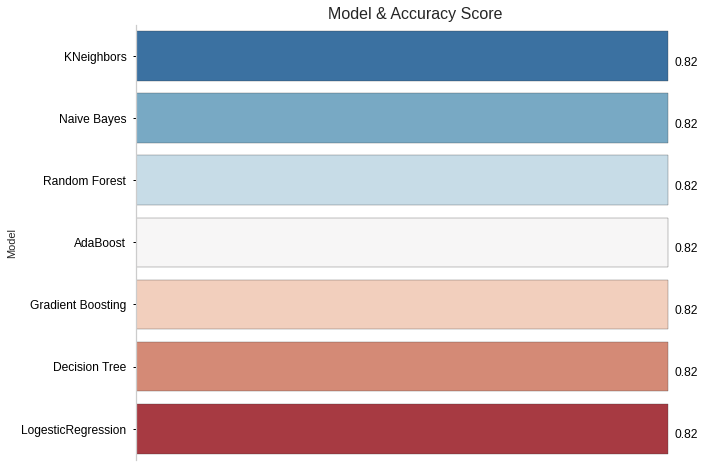

In [ ]:
classifier = ['KNeighbors','Naive Bayes','Random Forest','AdaBoost','Gradient Boosting','Decision Tree','LogesticRegression']
# Place result in a data Frame
ml_model = pd.DataFrame(model_score,classifier).reset_index()
ml_model.columns=['Model','acc_score']
ml_model.sort_values('acc_score',ascending = False,inplace=True)
ml_model.reset_index(drop=True,inplace = True)
f, ax = plt.subplots(figsize=(10,8))
sns.barplot('acc_score','Model',data=ml_model, ax=ax,palette='RdBu_r',edgecolor=".2")
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+.55, \
        str(round((i.get_width()), 2)), fontsize=12, color='black') 
kwargs= {'length':3, 'width':1, 'colors':'black','labelsize':'large'}
ax.tick_params(**kwargs)
x_axis = ax.axes.get_xaxis().set_visible(False)
ax.set_title('Model & Accuracy Score',fontsize=16)
sns.despine(bottom=True)
plt.show()

In [ ]:
kfold = StratifiedKFold(n_splits=10)
# Generate a simple plot of the test and training learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure(figsize = (10,5))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt.show()

plot_learning_curve(AdaBoostClassifier(),"AdaBoost Classifier Learning curves",X_train,y_train,cv=kfold)
plot_learning_curve(DecisionTreeClassifier(),"Decision Tree Classifier Learning curves",X_train,y_train,cv=kfold)
#plot_learning_curve(ExtraTreesClassifier(),"Extra Trees Classifier Learning curves",X_train,y_train,cv=kfold)
plot_learning_curve(RandomForestClassifier(),"Random Forest Classifier Learning curves",X_train,y_train,cv=kfold)
plot_learning_curve(GradientBoostingClassifier(),"Gradient Boosting Classifier Learning curves",X_train,y_train,cv=kfold)
plot_learning_curve(GaussianNB(),"Naive Bayes Classifier Learning curves",X_train,y_train,cv=5)
plot_learning_curve(LogisticRegression(),"Logestic Regression Classifier Learning curves",X_train,y_train,cv=5)
plot_learning_curve(MLPClassifier(),"MLP Classifier Learning curves",X_train,y_train,cv=5)
plot_learning_curve(KNeighborsClassifier(),"Nearest Neighbour Classifier Learning curves",X_train,y_train,cv=kfold)



NameError: ignored

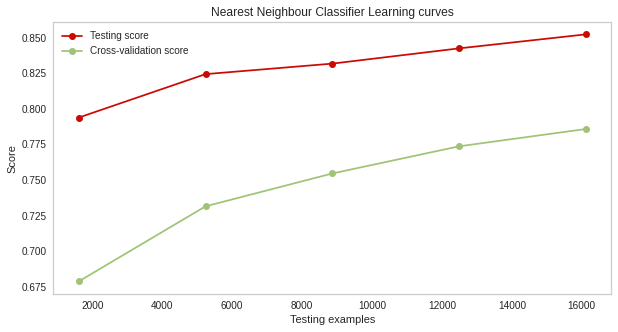

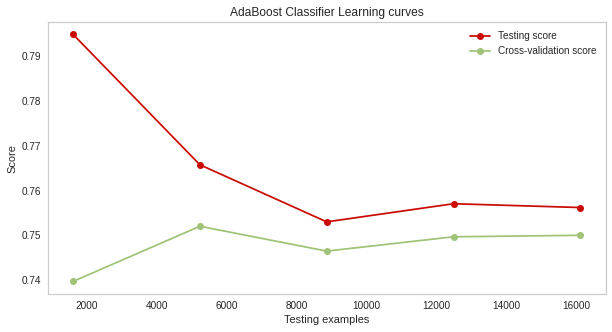

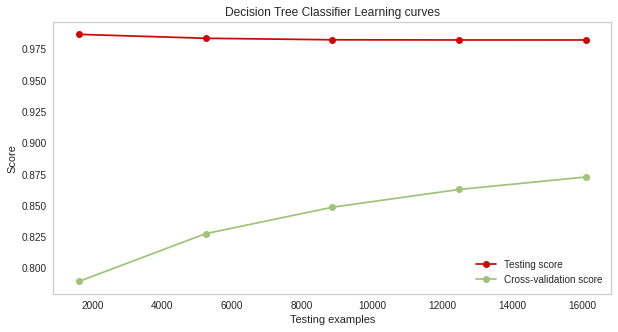

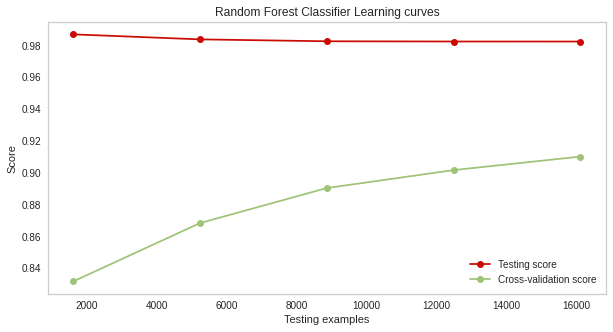

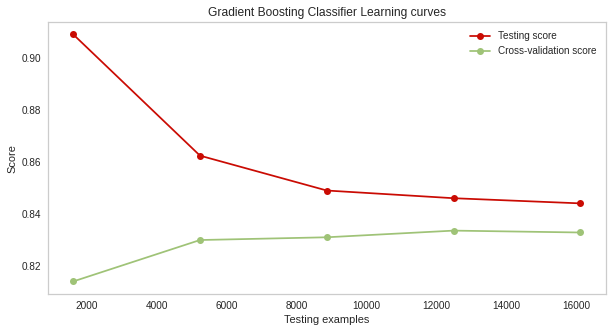

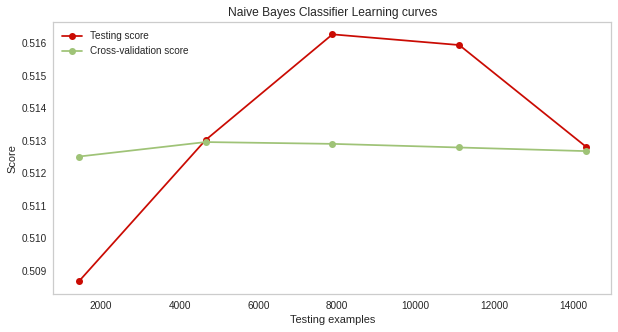

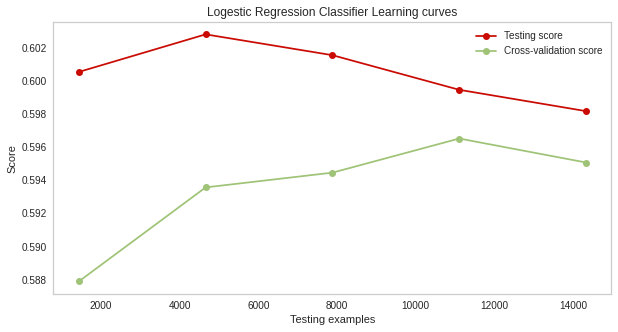

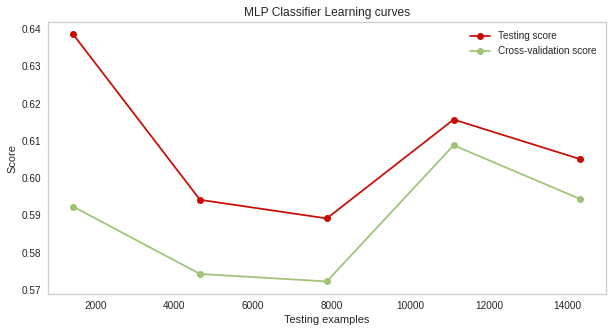

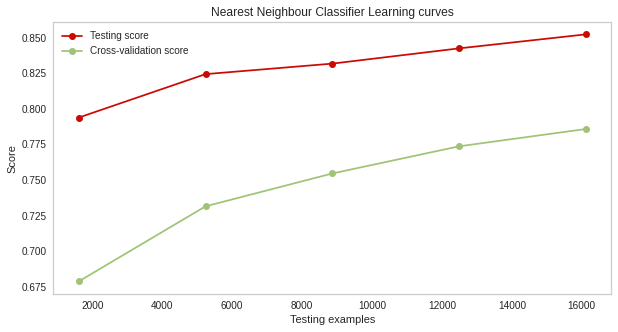

In [ ]:
kfold = StratifiedKFold(n_splits=10)
# Generate a simple plot of the test and training learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure(figsize = (10,5))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Testing examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Testing score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt.show()
#plot_learning_curve(ExtraTreesClassifier(),"Extra Trees Classifier Learning curves",X_test,y_test,cv=5)
plot_learning_curve(KNeighborsClassifier(),"Nearest Neighbour Classifier Learning curves",X_test,y_test,cv=kfold)
plot_learning_curve(AdaBoostClassifier(),"AdaBoost Classifier Learning curves",X_test,y_test,cv=kfold)
plot_learning_curve(DecisionTreeClassifier(),"Decision Tree Classifier Learning curves",X_test,y_test,cv=kfold)
#plot_learning_curve(ExtraTreesClassifier(),"Extra Trees Classifier Learning curves",X_test,y_test,cv=kfold)
plot_learning_curve(RandomForestClassifier(),"Random Forest Classifier Learning curves",X_test,y_test,cv=kfold)
plot_learning_curve(GradientBoostingClassifier(),"Gradient Boosting Classifier Learning curves",X_test,y_test,cv=kfold)
plot_learning_curve(GaussianNB(),"Naive Bayes Classifier Learning curves",X_test,y_test,cv=5)
plot_learning_curve(LogisticRegression(),"Logestic Regression Classifier Learning curves",X_test,y_test,cv=5)
plot_learning_curve(MLPClassifier(),"MLP Classifier Learning curves",X_test,y_test,cv=5)
plot_learning_curve(KNeighborsClassifier(),"Nearest Neighbour Classifier Learning curves",X_test,y_test,cv=kfold)


0.9380303707012059


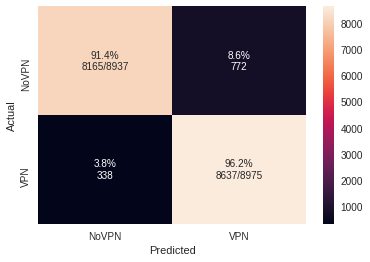

In [ ]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier(random_state=42)

visualizer = ClassificationReport(model, support='percent')
visualizer.fit(X_train, y_train)
y_pred=visualizer.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(15,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index, columns)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()
    
    

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(6,4))

Accuracy
0.9380303707012059


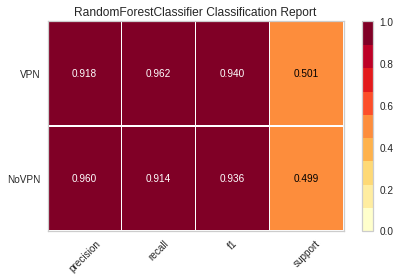

In [ ]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier(random_state=42)
visualizer = ClassificationReport(model, support='percent', classes=index)
visualizer.fit(X_train, y_train)  
print("Accuracy")
print(visualizer.score(X_test, y_test))  
g = visualizer.poof(dpi=200, format='png', bbox_inches='tight')

0.9139124609200536


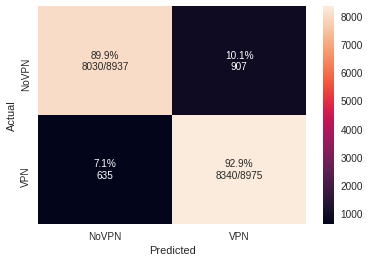

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
visualizer = ClassificationReport(model, support='percent')
visualizer.fit(X_train, y_train)
y_pred=visualizer.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(15,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index, columns)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()
    
    

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(6,4))

Accuracy
0.912795891022778


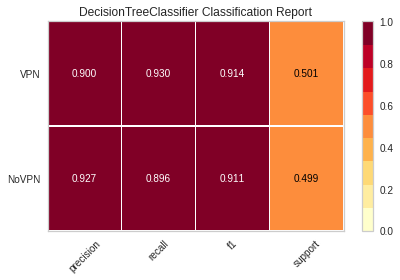

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
visualizer = ClassificationReport(model, support='percent', classes=index)
visualizer.fit(X_train, y_train)  
print("Accuracy")
print(visualizer.score(X_test, y_test))  
g = visualizer.poof(dpi=200, format='png', bbox_inches='tight')

0.8309513175524788


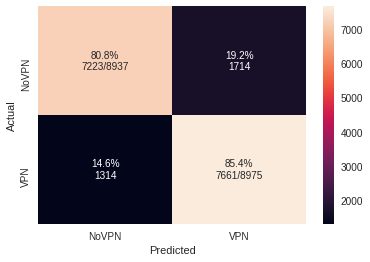

In [ ]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=5)
visualizer = ClassificationReport(model, support='percent')
visualizer.fit(X_train, y_train)
y_pred=visualizer.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(15,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index, columns)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()
    
    

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(6,4))

Accuracy
0.8309513175524788


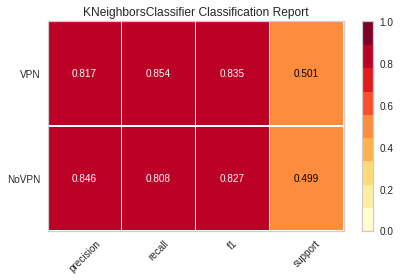

In [ ]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=5)
visualizer = ClassificationReport(model, support='percent', classes=index)
visualizer.fit(X_train, y_train)  
print("Accuracy")
print(visualizer.score(X_test, y_test))  
g = visualizer.poof(dpi=200, format='png', bbox_inches='tight')

0.510328271549799


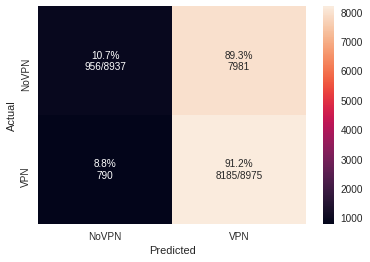

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
visualizer = ClassificationReport(model, support='percent')
visualizer.fit(X_train, y_train)
y_pred=visualizer.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(15,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index, columns)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)a
    plt.show()
    
    

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(6,4))

Accuracy
0.510328271549799


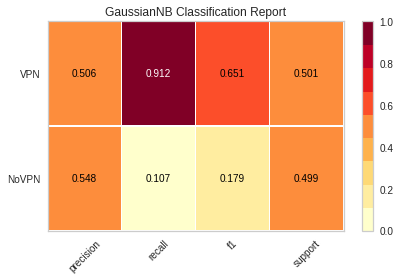

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
visualizer = ClassificationReport(model, support='percent', classes=index)
visualizer.fit(X_train, y_train)  
print("Accuracy")
print(visualizer.score(X_test, y_test))  
g = visualizer.poof(dpi=200, format='png', bbox_inches='tight')

0.5035730236712819


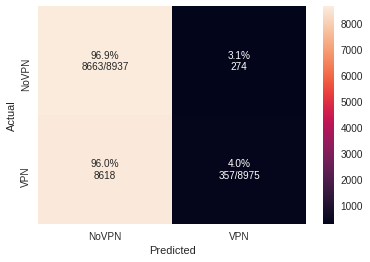

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(60,60,60))
visualizer = ClassificationReport(model, support='percent')
visualizer.fit(X_train, y_train)
y_pred=visualizer.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(15,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index, columns)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)a
    plt.show()
    
    

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(6,4))

Accuracy
0.5266860205448861


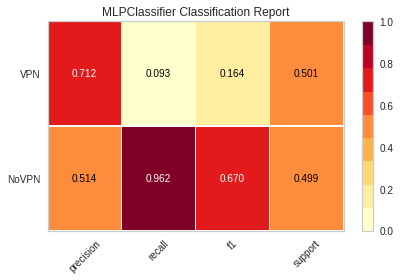

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(60,60,60))
visualizer = ClassificationReport(model, support='percent')
visualizer = ClassificationReport(model, support='percent', classes=index)
visualizer.fit(X_train, y_train)  
print("Accuracy")
print(visualizer.score(X_test, y_test))  
g = visualizer.poof(dpi=200, format='png', bbox_inches='tight')

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
visualizer = ClassificationReport(model, support='percent')
visualizer.fit(X_train, y_train)
y_pred=visualizer.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(15,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index, columns)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)a
    plt.show()
    
    

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(6,4))

NameError: ignored

Accuracy
0.5970857525681108


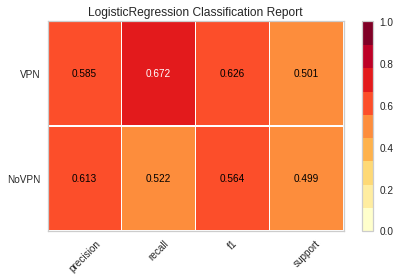

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
visualizer = ClassificationReport(model, support='percent', classes=index)
visualizer.fit(X_train, y_train)  
print("Accuracy")
print(visualizer.score(X_test, y_test))  
g = visualizer.poof(dpi=200, format='png', bbox_inches='tight')

0.9250781598928093


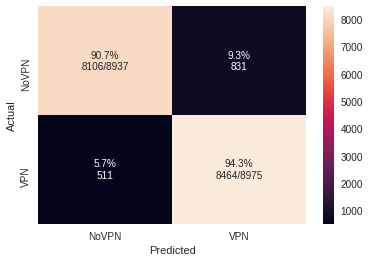

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier(random_state=42)
visualizer = ClassificationReport(model, support='percent')
visualizer.fit(X_train, y_train)
y_pred=visualizer.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(15,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index, columns)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)a
    plt.show()
    
    

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(6,4))

Accuracy
0.9250781598928093


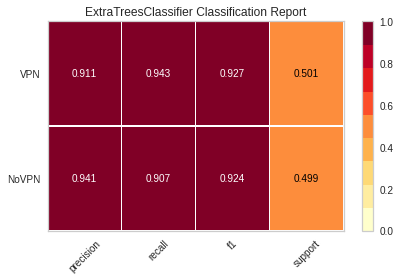

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier(random_state=42)
visualizer = ClassificationReport(model, support='percent', classes=index)
visualizer.fit(X_train, y_train)  
print("Accuracy")
print(visualizer.score(X_test, y_test))  
g = visualizer.poof(dpi=200, format='png', bbox_inches='tight')

0.7532938811969629


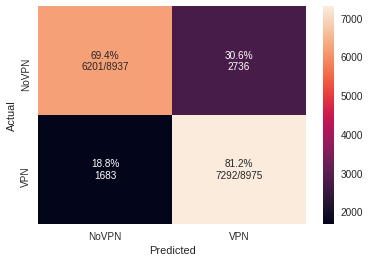

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
visualizer = ClassificationReport(model, support='percent')
visualizer.fit(X_train, y_train)
y_pred=visualizer.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(15,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index, columns)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)a
    plt.show()
    
    

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(6,4))

Accuracy
0.7532938811969629


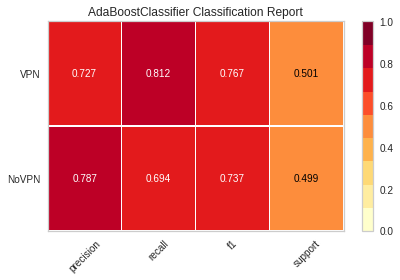

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
visualizer = ClassificationReport(model, support='percent',classes=index )
visualizer.fit(X_train, y_train)  
print("Accuracy")
print(visualizer.score(X_test, y_test))  
g = visualizer.poof(dpi=200, format='png', bbox_inches='tight')

0.8350267976775346


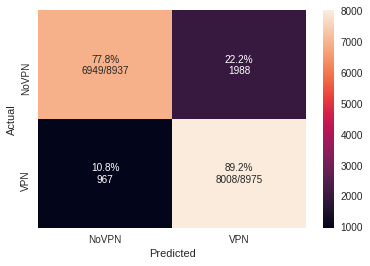

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
visualizer = ClassificationReport(model, support='percent')
visualizer.fit(X_train, y_train)
y_pred=visualizer.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(15,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index, columns)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)a
    plt.show()
    
    

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(6,4))

Accuracy
0.8350267976775346


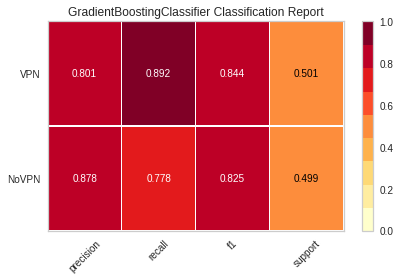

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
visualizer = ClassificationReport(model, support='percent',classes=index )
visualizer.fit(X_train, y_train)  
print("Accuracy")
print(visualizer.score(X_test, y_test))  
g = visualizer.poof(dpi=200, format='png', bbox_inches='tight')

Accuracy
0.8350267976775346


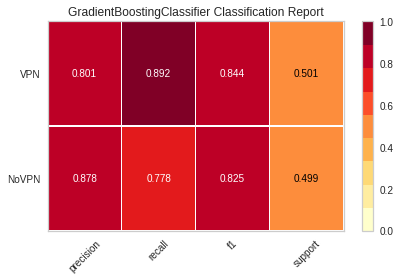

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
visualizer = ClassificationReport(model, support='percent',classes=index )
visualizer.fit(X_train, y_train)  
print("Accuracy")
print(visualizer.score(X_test, y_test))  
g = visualizer.poof(dpi=200, format='png', bbox_inches='tight')

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,n_jobs=-1)
visualizer = ClassificationReport(model, support='percent')
visualizer.fit(X_train, y_train)
y_pred=visualizer.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(15,10)):

    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index, columns)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)a
    plt.show()
    
    

cm_analysis(y_test, y_pred, model.classes_, ymap=None, figsize=(6,4))

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.3, n_jobs=-1)
                           
visualizer = ClassificationReport(model, support='percent',classes=index )
visualizer.fit(X_train, y_train)  
print("Accuracy")
print(visualizer.score(X_test, y_test))  
g = visualizer.poof(dpi=200, format='png', bbox_inches='tight')

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.3,n_jobs=-1)
visualizer = ClassificationReport(model, support='percent',classes=index )
visualizer.fit(X_train, y_train)  
print("Accuracy")
print(visualizer.score(X_test, y_test))  
g = visualizer.poof(dpi=200, format='png', bbox_inches='tight')

In [ ]:
#plot_learning_curve(ExtraTreesClassifier(),"Extra Trees Classifier Learning curves",X_test,y_test,cv=5)
plot_learning_curve(KNeighborsClassifier(),"Nearest Neighbour Classifier Learning curves",X_test,y_test,cv=kfold)
plot_learning_curve(AdaBoostClassifier(),"AdaBoost Classifier Learning curves",X_test,y_test,cv=kfold)
plot_learning_curve(DecisionTreeClassifier(),"Decision Tree Classifier Learning curves",X_test,y_test,cv=kfold)
#plot_learning_curve(ExtraTreesClassifier(),"Extra Trees Classifier Learning curves",X_test,y_test,cv=kfold)
plot_learning_curve(RandomForestClassifier(),"Random Forest Classifier Learning curves",X_test,y_test,cv=kfold)
plot_learning_curve(GradientBoostingClassifier(),"Gradient Boosting Classifier Learning curves",X_test,y_test,cv=kfold)
plot_learning_curve(GaussianNB(),"Naive Bayes Classifier Learning curves",X_test,y_test,cv=5)
plot_learning_curve(LogisticRegression(),"Logestic Regression Classifier Learning curves",X_test,y_test,cv=5)
plot_learning_curve(MLPClassifier(),"MLP Classifier Learning curves",X_test,y_test,cv=5)
plot_learning_curve(KNeighborsClassifier(),"Nearest Neighbour Classifier Learning curves",X_test,y_test,cv=kfold)


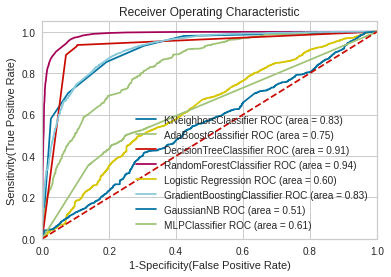

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'KNeighborsClassifier',
    'model': KNeighborsClassifier(),
},
{
    'label': 'AdaBoostClassifier',
    'model': AdaBoostClassifier(),
},
{
    'label': 'DecisionTreeClassifier',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'RandomForestClassifier',
    'model': RandomForestClassifier(),
},
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'GradientBoostingClassifier',
    'model': GradientBoostingClassifier(),
},
{
    'label': 'GaussianNB',
    'model': GaussianNB(),
},

{
    'label': 'MLPClassifier',
    'model': MLPClassifier(),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Displa